<font size=6><b> lec08. pandas bike</b></font>

<img src="./img/lec08_bike.png"><br>
* ref : https://www.kaggle.com/competitions/bike-sharing-demand/data
* ref : https://archive.ics.uci.edu/ml/index.php

# Data Fields Desc.

<ul>
<li><strong>datetime</strong> - hourly date + timestamp  </li>
<li><strong>season</strong> -  1 = spring, 2 = summer, 3 = fall, 4 = winter </li>
<li><strong>holiday</strong> - whether the day is considered a holiday</li>
<li><strong>workingday</strong> - whether the day is neither a weekend nor holiday</li>
<li><strong>weather</strong> - <br>
<ul><li>1 - Clear, Few clouds, Partly cloudy, Partly cloudy</li>
<li>2 -  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
<li>3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  </li>
<li>4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </li></ul></li>
<li><strong>temp</strong> - temperature in Celsius</li>
<li><strong>atemp</strong> - "feels like" temperature in Celsius</li>
<li><strong>humidity</strong> - relative humidity</li>
<li><strong>windspeed</strong> - wind speed</li>
<li><strong>casual</strong> - number of non-registered user rentals initiated</li>
<li><strong>registered</strong> - number of registered user rentals initiated</li>
<li><strong>count</strong> - number of total rentals</li>
</ul></div>

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#------------------------------------------------------------------ 학습데이터셋
from sklearn.model_selection import train_test_split

#------------------------------------------------------------------ CART(Classification and Regression Tree)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC, NuSVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor,  AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  #----------------*****


#------------------------------------------------------------------ 증강학습
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE

#------------------------------------------------------------------ 스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


#------------------------------------------------------------------ 평가관련
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
# MAE
# MSE  : (squared=True)
# RMSE : (squared=False)
# MSLE

#------------------------------------------------------------------ 튜닝관련
import optuna

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# Data Load
* 파일 읽어서 데이터프레임을 만드는 작업

## DataFrame 생성
<pre>
* 날짜 타입 변경
 pd.read_csv(속성)
 pd.to_datetime()
 df.astype('datetime64[ns]')
 df.apply(람다)
 

In [2]:
train_df  = pd.read_csv("./train.csv" , sep=",",parse_dates=['datetime'])
test_df   = pd.read_csv("./test.csv" , sep="," ,parse_dates=['datetime'])
submit_df = pd.read_csv("./sampleSubmission.csv" , sep=",")

## DataFrame 구조 확인
* df.info()  
    * df.shape
    * df.isna().sum() -- 결측갯수확인
    * df.dtypes -- object
* df.head()


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## 0 데이터 확인

In [4]:
cols = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
for col in cols:
    print(train_df[train_df[col] == 0][col].value_counts())

Series([], Name: season, dtype: int64)
0    10575
Name: holiday, dtype: int64
0    3474
Name: workingday, dtype: int64
Series([], Name: weather, dtype: int64)
Series([], Name: temp, dtype: int64)
Series([], Name: atemp, dtype: int64)
0    22
Name: humidity, dtype: int64
0.0    1313
Name: windspeed, dtype: int64


# train test 분포도

In [5]:
df = pd.concat([train_df, test_df], axis=0)
df['gubun'] = "train"                        #-----------train
df.iloc[-test_df.shape[0]:, -1] = "test"    #-----------test
df = df.reset_index(drop=True)
df.gubun.value_counts()

train    10886
test      6493
Name: gubun, dtype: int64

In [6]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'gubun'],
      dtype='object')

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,gubun
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,train


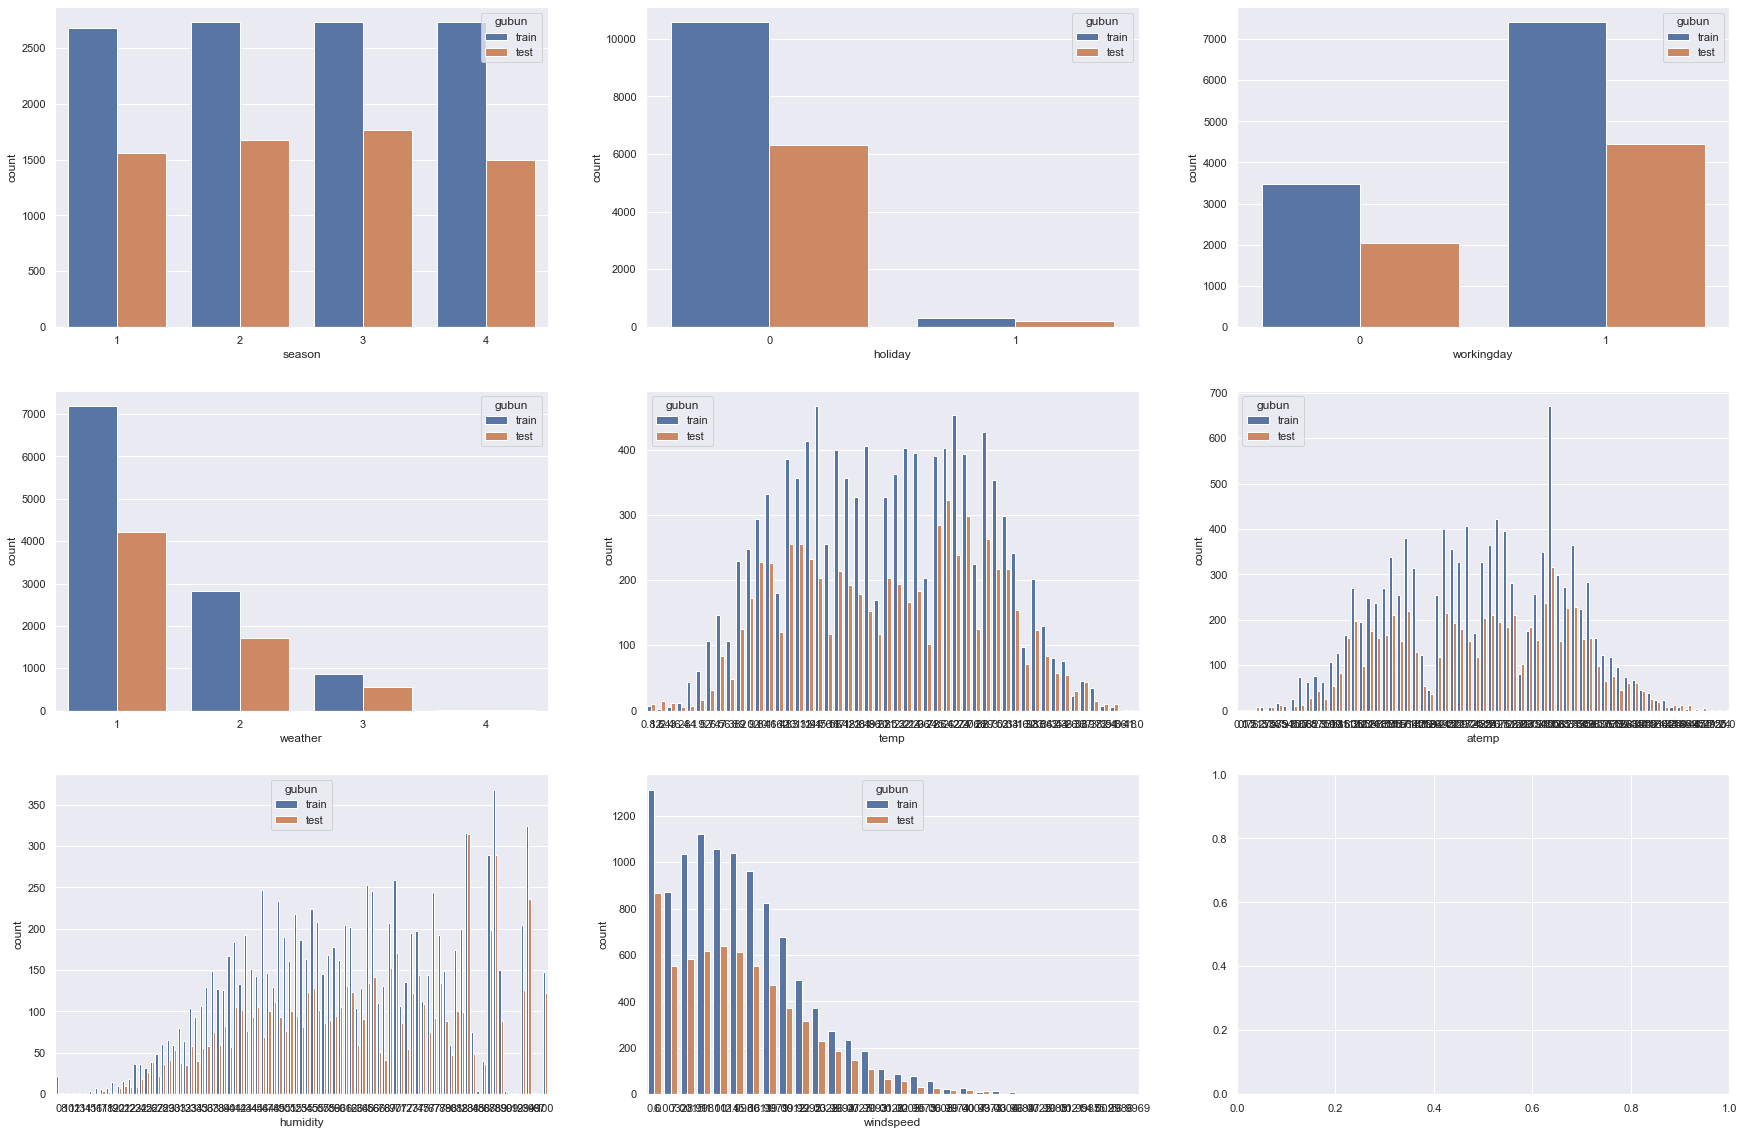

In [8]:
cols = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))

for i in range(len(cols)):
    col = cols[i]
    r = i//3
    c = i%3
    sns.countplot(x=col, data=df, hue='gubun', ax=axes[r][c])
plt.show()
plt.close()

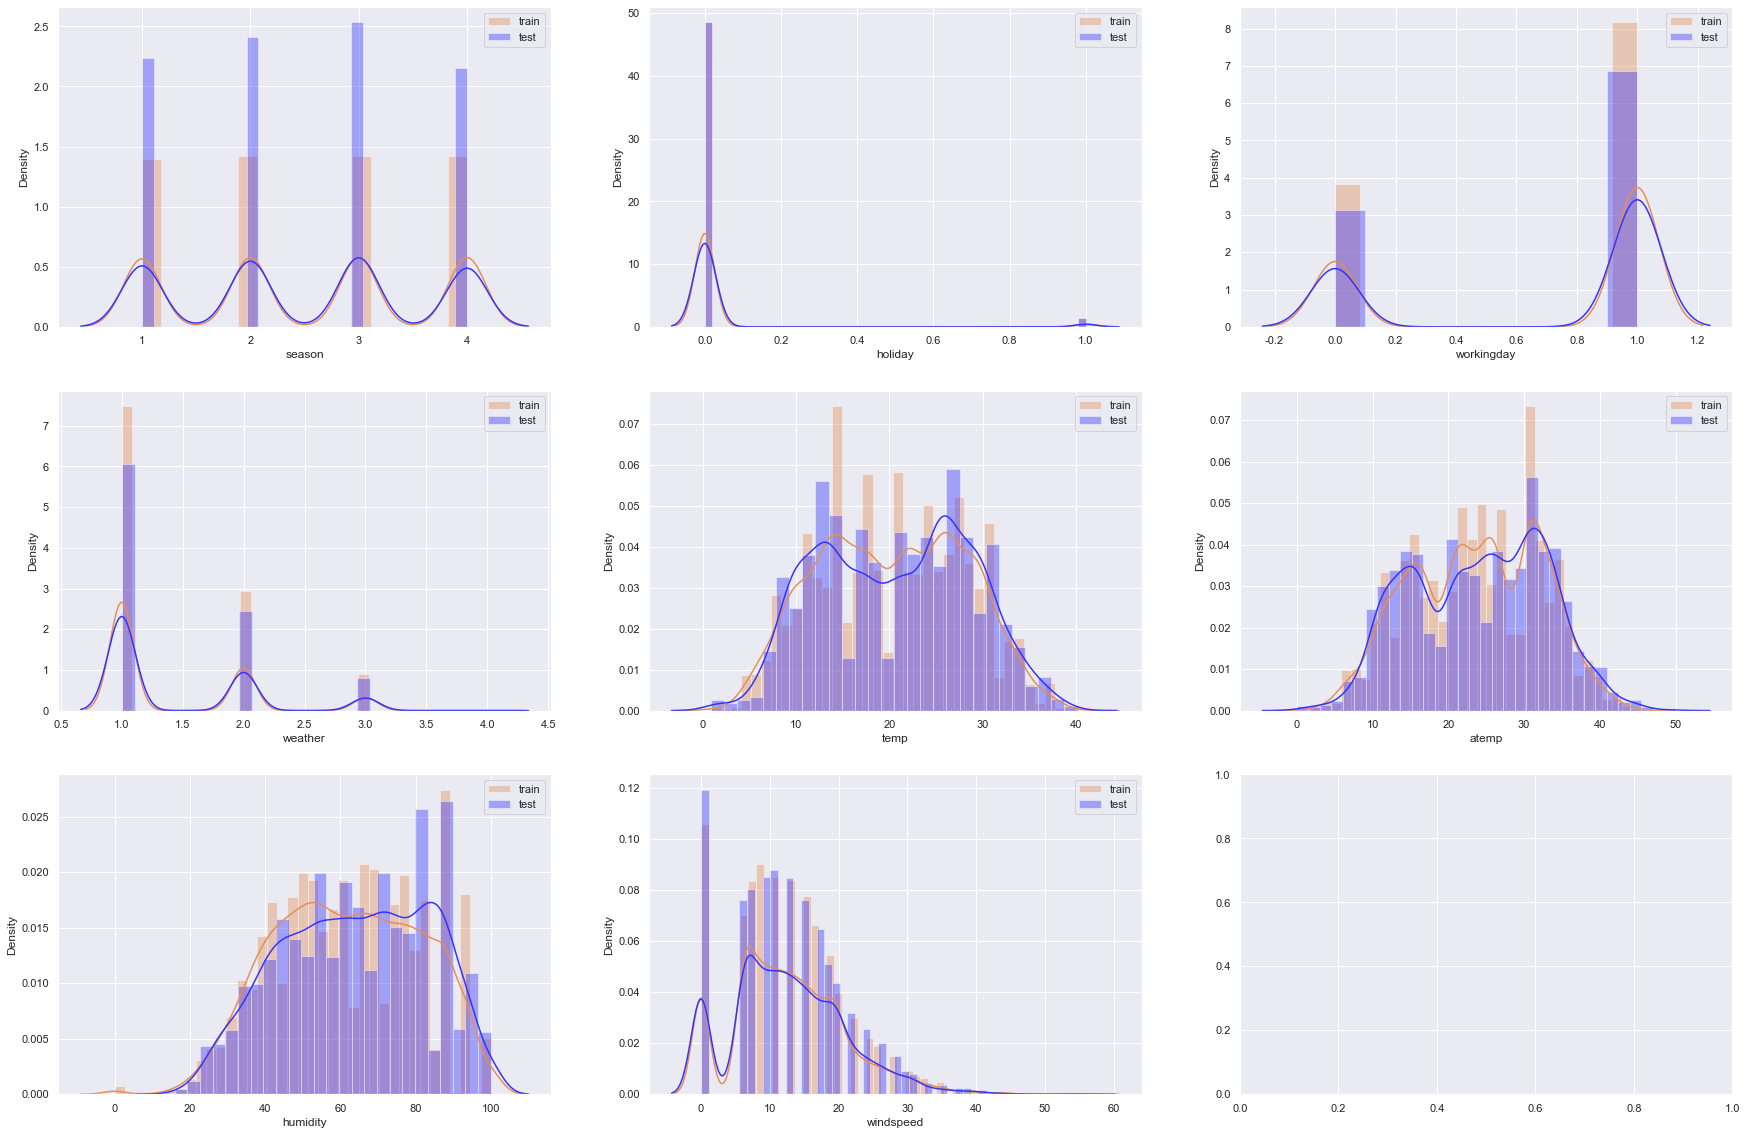

In [9]:
cols = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))

for i in range(len(cols)):
    col = cols[i]
    r = i//3
    c = i%3
    sns.distplot(train_df[col] , color="#E48E58", fit_kws={"color":"#E48E58"},label="train",ax=axes[r][c])
    sns.distplot(test_df[col] , color="#3333FF", fit_kws={"color":"#3333FF"},label="test", ax=axes[r][c])
    axes[r][c].legend()
plt.show()    

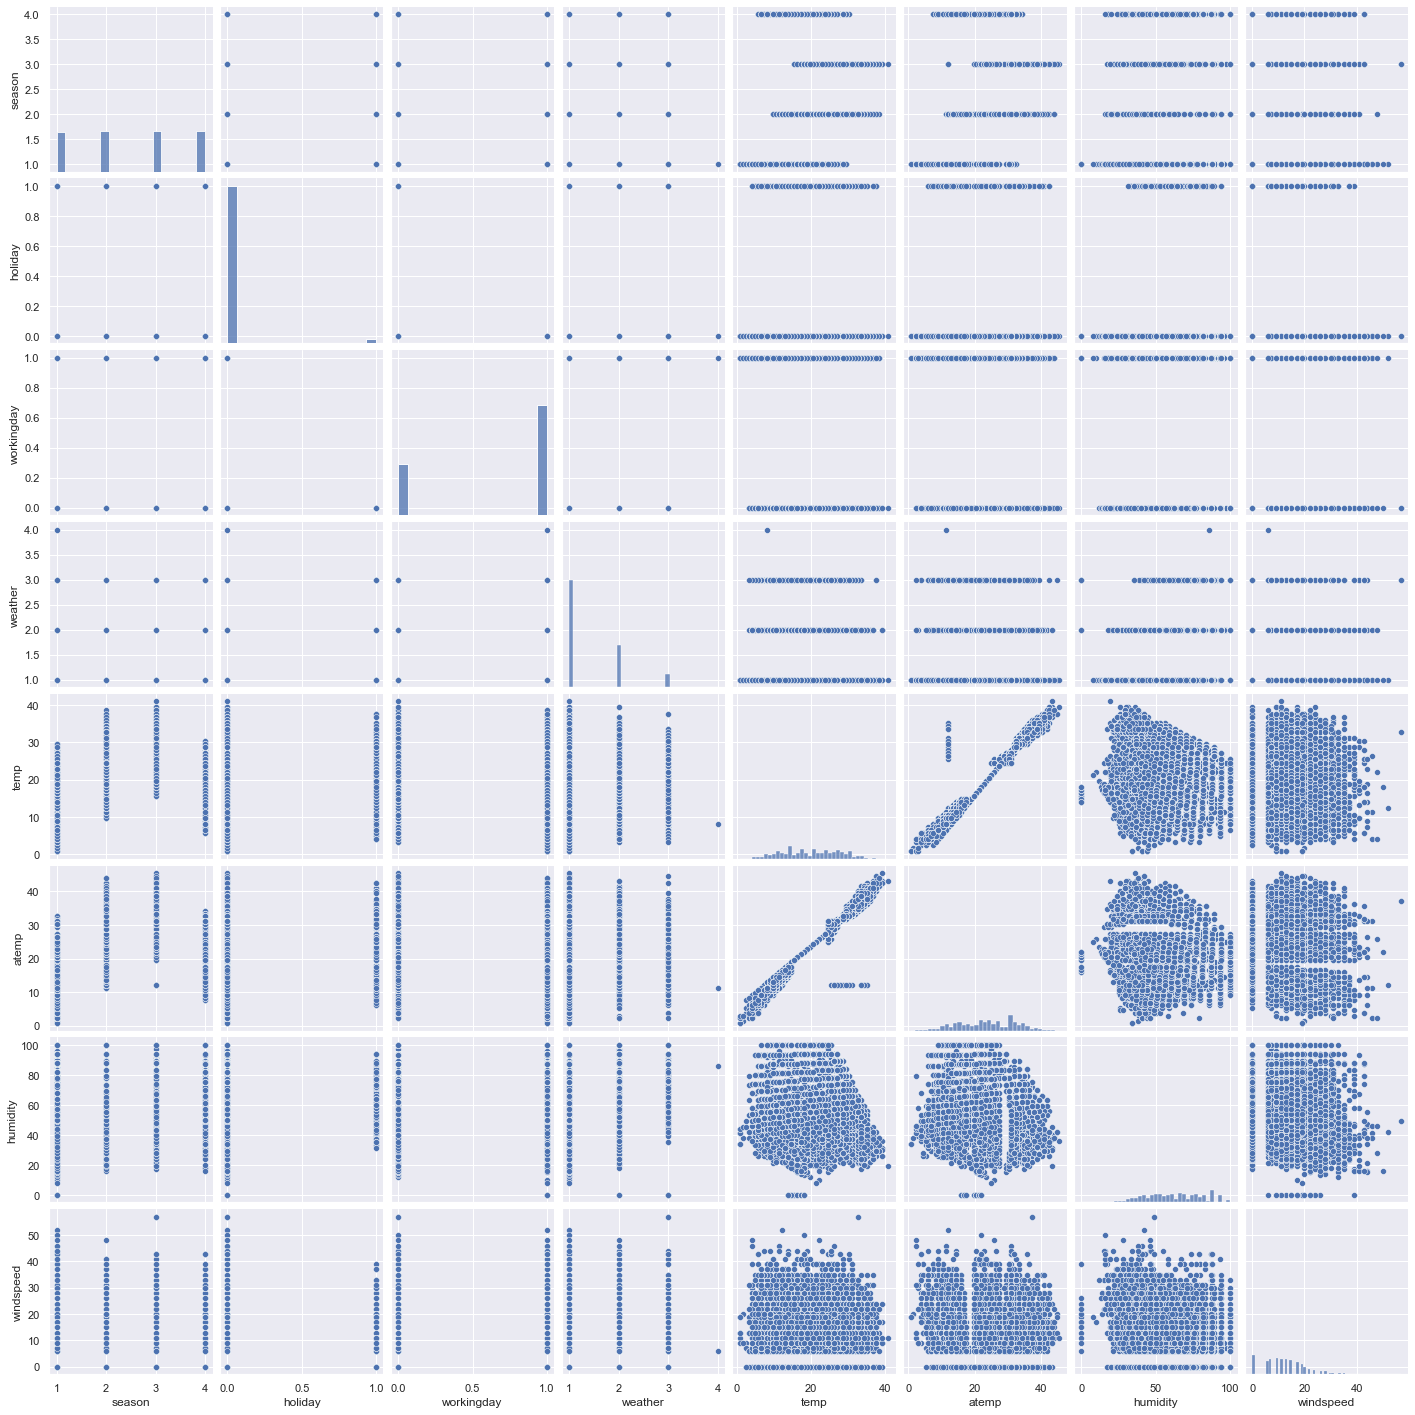

In [10]:
sns.pairplot(train_df[cols])

# 날짜 가공
* rdate : 2011-01-01 01:00:00
* yy mm dd hh week : 컬럼 추가 생성

<pre>
type(dt.datetime.today().weekday())
class datetime : 
    def weekday(datetimens64_prm):
        res = 0
        if..  res = 1
        elif... res = 2
        return res

In [11]:
df['yy']   = df['datetime'].dt.year
df['mm']   = df['datetime'].dt.month
df['dd']   = df['datetime'].dt.day
df['hh']   = df['datetime'].dt.hour
df['week'] = df['datetime'].dt.weekday    #5, 6 :주말
df['dow']  = df['datetime'].dt.dayofweek  #주수

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,gubun,yy,mm,dd,hh,week,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,train,2011,1,1,0,5,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,train,2011,1,1,1,5,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,train,2011,1,1,2,5,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,train,2011,1,1,3,5,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,train,2011,1,1,4,5,5


In [13]:
df['rdate'] = df['datetime'].apply(lambda xstr : dt.datetime.strftime(xstr , '%Y-%m-%d') )
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,gubun,yy,mm,dd,hh,week,dow,rdate
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,train,2011,1,1,0,5,5,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,train,2011,1,1,1,5,5,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,train,2011,1,1,2,5,5,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,train,2011,1,1,3,5,5,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,train,2011,1,1,4,5,5,2011-01-01


In [14]:
# sns.countplot(x='rdate', data=df, hue='gubun') 

<AxesSubplot:>

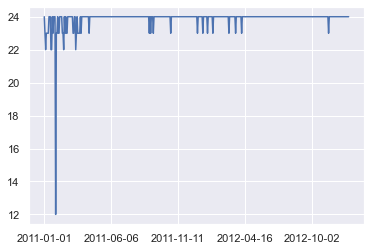

In [15]:
df[df['gubun']=='train']['rdate'].value_counts().sort_index().plot()

<AxesSubplot:>

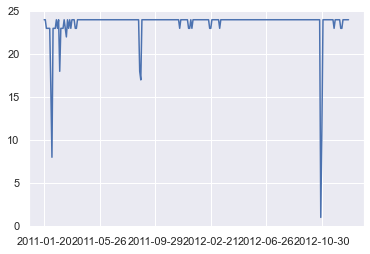

In [16]:
df[df['gubun']=='test']['rdate'].value_counts().sort_index().plot()

In [17]:
df[df['gubun']=='train']['rdate'].value_counts().sort_index().head(40)

2011-01-01    24
2011-01-02    23
2011-01-03    22
2011-01-04    23
2011-01-05    23
2011-01-06    23
2011-01-07    23
2011-01-08    24
2011-01-09    24
2011-01-10    24
2011-01-11    22
2011-01-12    22
2011-01-13    24
2011-01-14    23
2011-01-15    24
2011-01-16    24
2011-01-17    24
2011-01-18    12
2011-01-19    23
2011-02-01    23
2011-02-02    24
2011-02-03    23
2011-02-04    23
2011-02-05    24
2011-02-06    24
2011-02-07    24
2011-02-08    24
2011-02-09    23
2011-02-10    23
2011-02-11    22
2011-02-12    24
2011-02-13    23
2011-02-14    24
2011-02-15    23
2011-02-16    23
2011-02-17    24
2011-02-18    24
2011-02-19    24
2011-03-01    24
2011-03-02    24
Name: rdate, dtype: int64

# 대여수 확인
* casual : 현장 대여
* registered : 예약 대여
* count : 총 대여

In [18]:
len(df[ df['casual'] + df['registered'] == df['count'] ])

10886

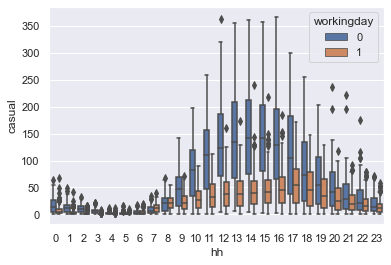

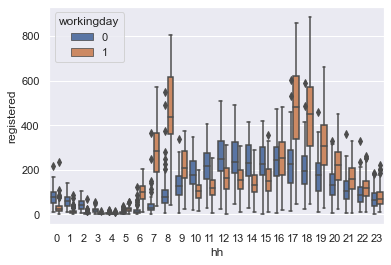

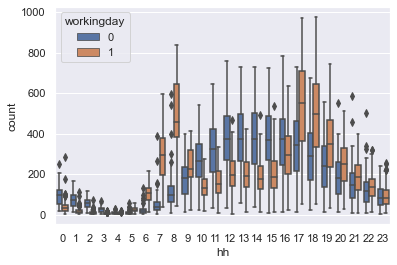

In [21]:
sns.boxplot(x="hh", y="casual", data=df, hue="workingday")
plt.show()
plt.close()
sns.boxplot(x="hh", y="registered", data=df, hue="workingday")
plt.show()
plt.close()
sns.boxplot(x="hh", y="count", data=df, hue="workingday")
plt.show()
plt.close()

## 불필요한 컬럼 삭제
* casual : 현장 대여
* registered : 예약 대여

In [22]:
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [23]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,gubun,yy,mm,dd,hh,week,dow,rdate
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,train,2011,1,1,0,5,5,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,train,2011,1,1,1,5,5,2011-01-01


# EDA (Exploratory Data Analysis)
* 탐색적 데이터 분석

In [24]:
train_df = df[df['gubun']=='train']
test_df = df[df['gubun']=='test']

In [25]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,yy,mm,dd,hh,week,dow
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000,6.000000


In [26]:
test_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,yy,mm,dd,hh,week,dow
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,0.0,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,NaN,2011.503619,6.565070,25.224550,11.555367,3.007239,3.007239
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,NaN,0.500025,3.429462,3.339411,6.912526,1.997714,1.997714
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,NaN,2011.000000,1.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,NaN,2011.000000,4.000000,22.000000,6.000000,1.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,NaN,2012.000000,7.000000,25.000000,12.000000,3.000000,3.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,NaN,2012.000000,10.000000,28.000000,18.000000,5.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,NaN,2012.000000,12.000000,31.000000,23.000000,6.000000,6.000000


## barplot

In [27]:
train_df["yy"].value_counts()

2012    5464
2011    5422
Name: yy, dtype: int64

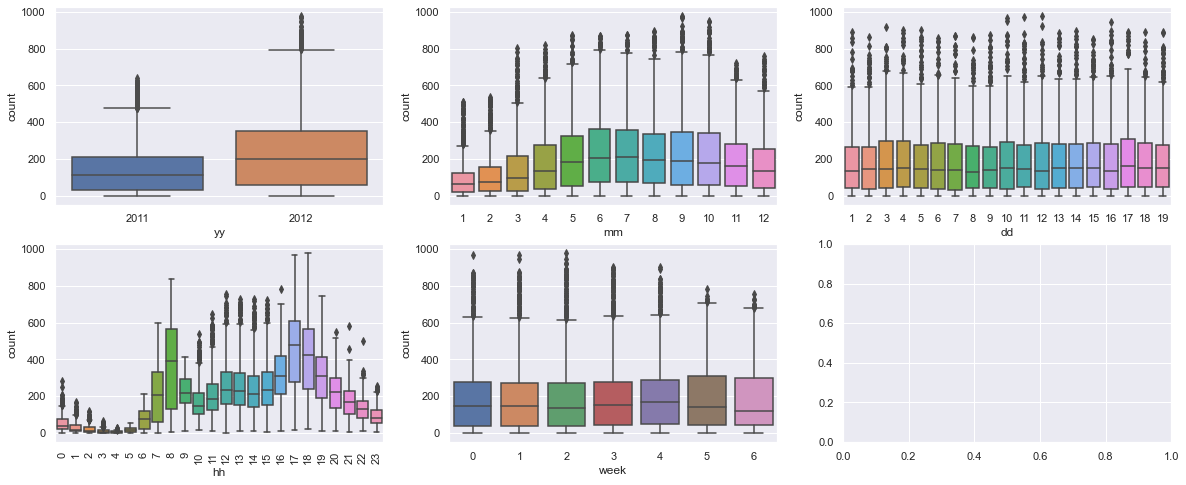

In [28]:
p, axes = plt.subplots(2,3, figsize=(20,8))
sns.boxplot(train_df["yy"], train_df["count"], ax=axes[0][0])
sns.boxplot(train_df["mm"], train_df["count"], ax=axes[0][1])
sns.boxplot(train_df["dd"], train_df["count"], ax=axes[0][2])
sns.boxplot(train_df["hh"], train_df["count"], ax=axes[1,0])
axes[1][0].tick_params(axis='x', labelrotation=90)   #------------x축 세로로 출력

sns.boxplot(train_df["week"], train_df["count"], ax=axes[1][1])
# sns.boxplot(train_df["hh"], train_df["casual"], ax=axes[1,0])
# sns.boxplot(train_df["hh"], train_df["registered"], ax=axes[1,0])
plt.show()

## boxplot, swarmplot

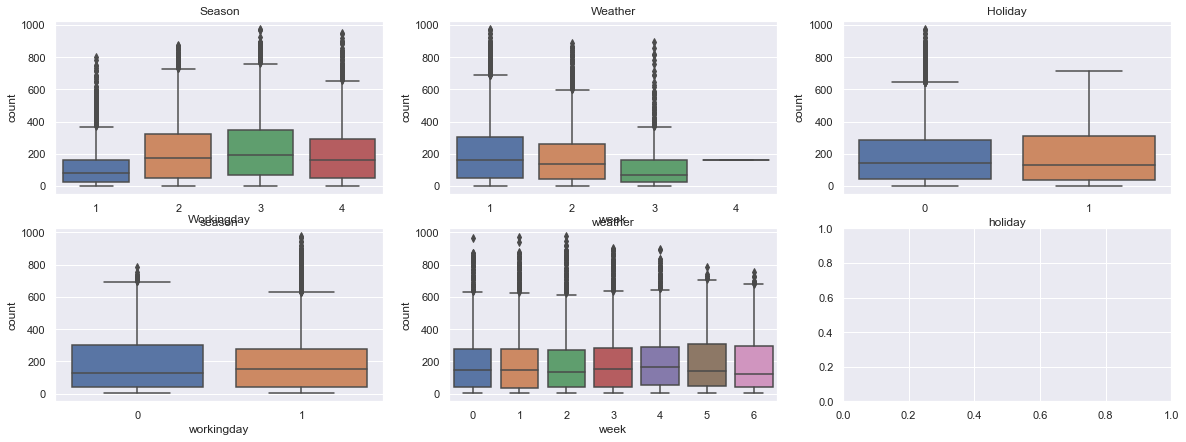

In [29]:
fig, ax = plt.subplots(2,3, figsize=(20,7)) 

# sns.swarmplot(data=df, x="season", y="count", ax=ax[0,0])
sn = sns.boxplot(train_df['season'],     train_df['count'], ax=ax[0,0])
wr = sns.boxplot(train_df['weather'],    train_df['count'], ax=ax[0,1])
hy = sns.boxplot(train_df['holiday'],    train_df['count'], ax=ax[0,2])
wy = sns.boxplot(train_df['workingday'], train_df['count'], ax=ax[1,0])
wk = sns.boxplot(train_df["week"],       train_df["count"], ax=ax[1,1])

sn.set_title("Season")
wr.set_title("Weather")
hy.set_title("Holiday")
wy.set_title("Workingday")
wk.set_title("week")
plt.show()

## regplot
* scatter  + line

In [30]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'gubun', 'yy', 'mm', 'dd',
       'hh', 'week', 'dow', 'rdate'],
      dtype='object')

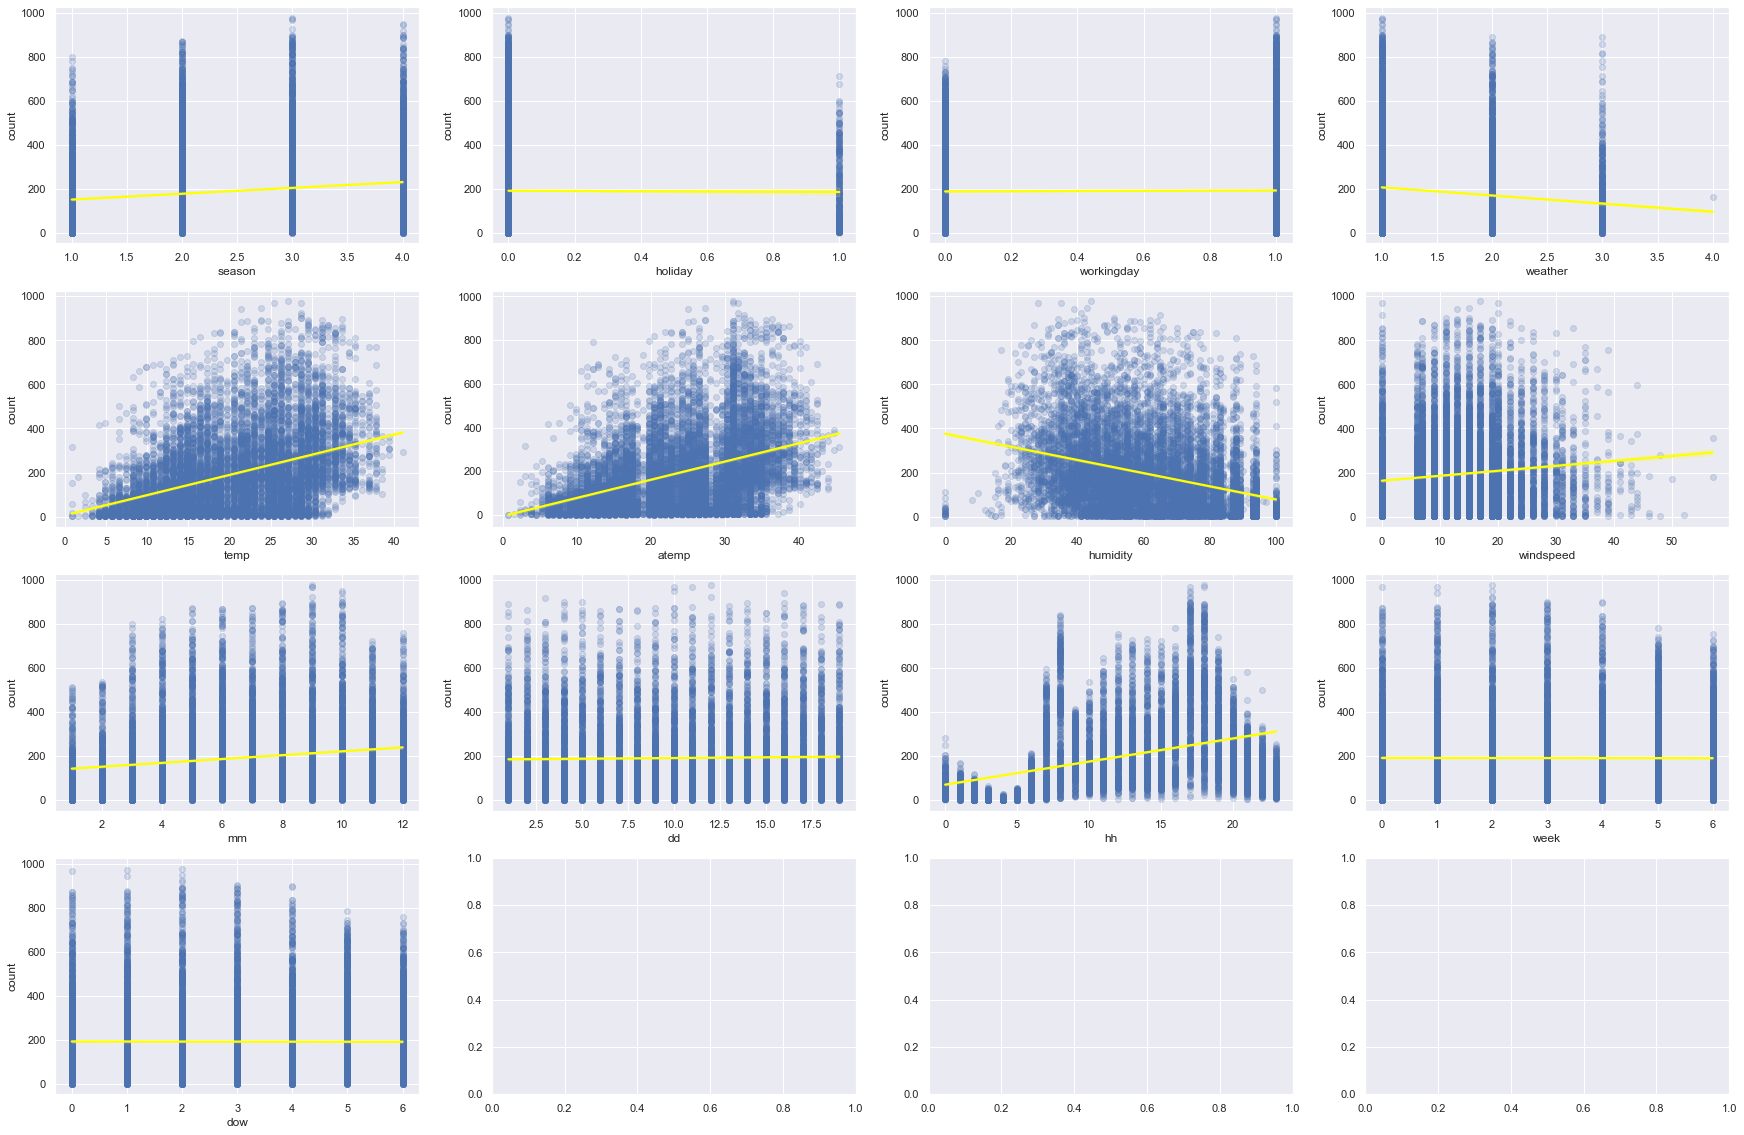

In [31]:
cols = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'mm', 'dd','hh', 'week', 'dow']
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 20))
for i in range(len(cols)):
    col = cols[i]
    r = i//4
    c = i%4
    sns.regplot(x=col, y='count', data=train_df
                , scatter_kws={'alpha': 0.2}     #---- 점의 투명도
                , line_kws={'color': 'yellow'}   #---- 회귀선 컬러
                ,ax=axes[r][c]
           )
plt.show()  

In [32]:
df[df['weather'] ==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,gubun,yy,mm,dd,hh,week,dow,rdate
5631,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86,6.0032,164.0,train,2012,1,9,18,0,0,2012-01-09
11040,2011-01-26 16:00:00,1,0,1,4,9.02,9.850,93,22.0028,NaN,test,2011,1,26,16,2,2,2011-01-26
14134,2012-01-21 01:00:00,1,0,0,4,5.74,6.820,86,12.9980,NaN,test,2012,1,21,1,5,5,2012-01-21


## heatmap

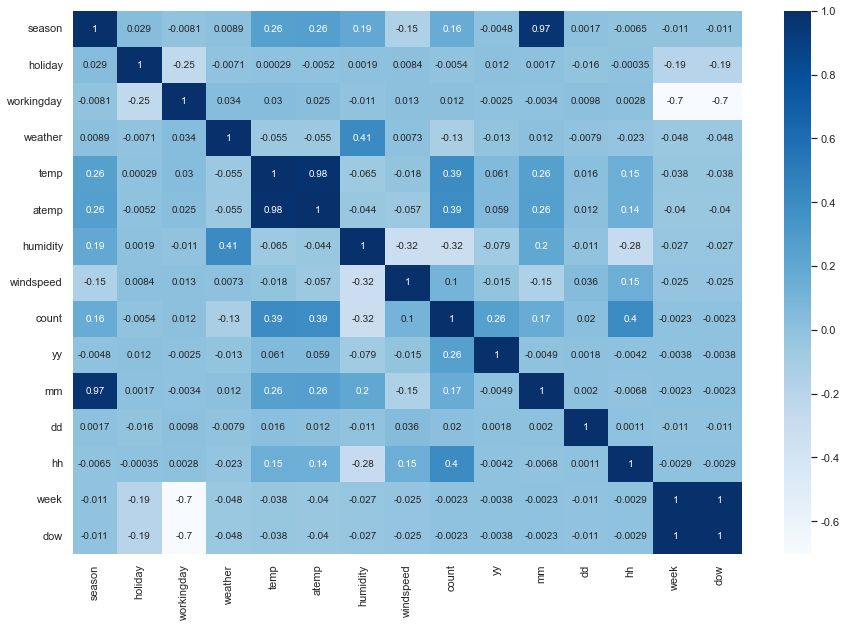

In [33]:
# sns.set(rc = {'figure.figsize':(15,8)})
plt.figure(figsize = (15,10))
sns.heatmap(train_df.corr() , annot=True, cmap='Blues')
plt.show()

* 양의상관관계 Top3

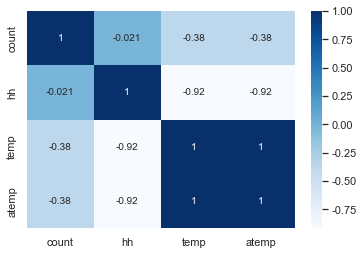

In [34]:
ldf = train_df.corr().nlargest(4, 'count')
sns.heatmap(ldf[ldf.index].corr(), annot=True, cmap='Blues')
plt.show()

* 음의상관관계 Top3

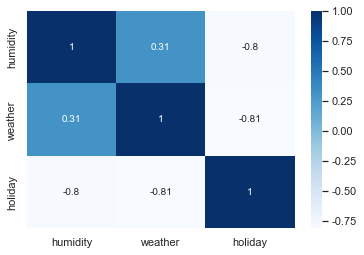

In [35]:
sdf = train_df.corr().nsmallest(3, 'count')
# idx= np.append('count',sdf.index)  #------------ 카운트 자신도 추가
sns.heatmap(sdf[sdf.index].corr(), annot=True, cmap='Blues')
plt.show()

In [36]:
df[['temp','atemp','windspeed']].describe()

,temp,atemp,windspeed
count,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,12.736540
std,7.894801,8.592511,8.196795
min,0.820000,0.000000,0.000000
25%,13.940000,16.665000,7.001500
50%,20.500000,24.240000,12.998000
75%,27.060000,31.060000,16.997900
max,41.000000,50.000000,56.996900


## workingday week holiday
* holiday: 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
* workingday: 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일

<pre>
holiday: 1    : 평일 빨간날      0 : 평일검은날+주말
workingday: 1 : 평일 검은날      0 : 평일빨간날+주말    주말+평일빨간날

In [37]:
train_df.shape

(10886, 18)

* workingday(0) holiday(0) : 주말
* workingday(0) holiday(1) : 평일 빨간날
* workingday(1) holiday(0) : 평일 검은날
* workingday(1) holiday(1) : 평일 검은날+평일빨간날

In [38]:
pd.crosstab(train_df['workingday'],train_df['holiday'])

holiday,0,1
workingday,,
0,3163,311
1,7412,0


In [39]:
pd.crosstab(train_df['workingday'],train_df['week'])

week,0,1,2,3,4,5,6
workingday,,,,,,,
0,239,0,24,0,48,1584,1579
1,1312,1539,1527,1553,1481,0,0


In [40]:
pd.crosstab(train_df['holiday'],train_df['week'])

week,0,1,2,3,4,5,6
holiday,,,,,,,
0,1312,1539,1527,1553,1481,1584,1579
1,239,0,24,0,48,0,0


* 1870년 6월 28일 처음 지정된 연방 공휴일은 
  새해 첫날 (1월 1일), 독립기념일 (7월 4일), 추수감사절 (11월 마지막 목요일[1]), 크리스마스 (12월 25일)이다.
* 추수감사절 : 2011-11-24, 2012-11-29

In [41]:
test_df[ (test_df['rdate'] == '2011-11-24') | (test_df['rdate'] == '2012-11-29')][['workingday','holiday']].head()

,workingday,holiday
13657,0,1
13658,0,1
13659,0,1
13660,0,1
13661,0,1


In [42]:
test_df[ (test_df['rdate'] == '2011-12-25') | (test_df['rdate'] == '2012-12-25')][['workingday','holiday']].head()

,workingday,holiday
13944,0,0
13945,0,0
13946,0,0
13947,0,0
13948,0,0


In [43]:
train_df[ (train_df['rdate'] == '2011-07-04') | (train_df['rdate'] == '2012-07-04')][['workingday','holiday']].head()

,workingday,holiday
2762,0,1
2763,0,1
2764,0,1
2765,0,1
2766,0,1


In [44]:
train_df[ (train_df['rdate'] == '2011-01-01') | (train_df['rdate'] == '2012-01-01')][['workingday','holiday']].head()

,workingday,holiday
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


* sandy :  2012년 10월 말

In [45]:
test_df[ (test_df['rdate'] == '2012-10-30') | (test_df['rdate'] == '2012-10-31')][['workingday','holiday']].head()

,workingday,holiday
16795,1,0
16796,1,0
16797,1,0
16798,1,0
16799,1,0


## season weather mm
* weather==4 대여수 분석

* 각각 년,월,요일,계절 별  대여수

In [46]:
pd.crosstab(df['season'], df['mm'])

mm,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,1429,1341,949,0,0,0,0,0,0,0,0,523
2,0,0,524,1437,1488,960,0,0,0,0,0,0
3,0,0,0,0,0,480,1488,1475,1053,0,0,0
4,0,0,0,0,0,0,0,0,384,1451,1437,960


In [47]:
# df[(df['season']==2)  & (df['yy']==2011)]["mm"].value_counts()

In [48]:
df.groupby('season')['count'].sum()

season
1    312498.0
2    588282.0
3    640662.0
4    544034.0
Name: count, dtype: float64

In [49]:
df.groupby('weather')['count'].sum()

weather
1    1476063.0
2     507160.0
3     102089.0
4        164.0
Name: count, dtype: float64

In [50]:
pd.crosstab(df[df['weather']==4]['weather'], df['season'])  #, 'workingday']])

season,1
weather,
4,3


In [51]:
pd.crosstab(df[df['weather']==4]['weather'], df['workingday'])  #, 'workingday']])

workingday,0,1
weather,,
4,1,2


In [52]:
df[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,gubun,yy,mm,dd,hh,week,dow,rdate
5631,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86,6.0032,164.0,train,2012,1,9,18,0,0,2012-01-09
11040,2011-01-26 16:00:00,1,0,1,4,9.02,9.850,93,22.0028,NaN,test,2011,1,26,16,2,2,2011-01-26
14134,2012-01-21 01:00:00,1,0,0,4,5.74,6.820,86,12.9980,NaN,test,2012,1,21,1,5,5,2012-01-21


# 가공

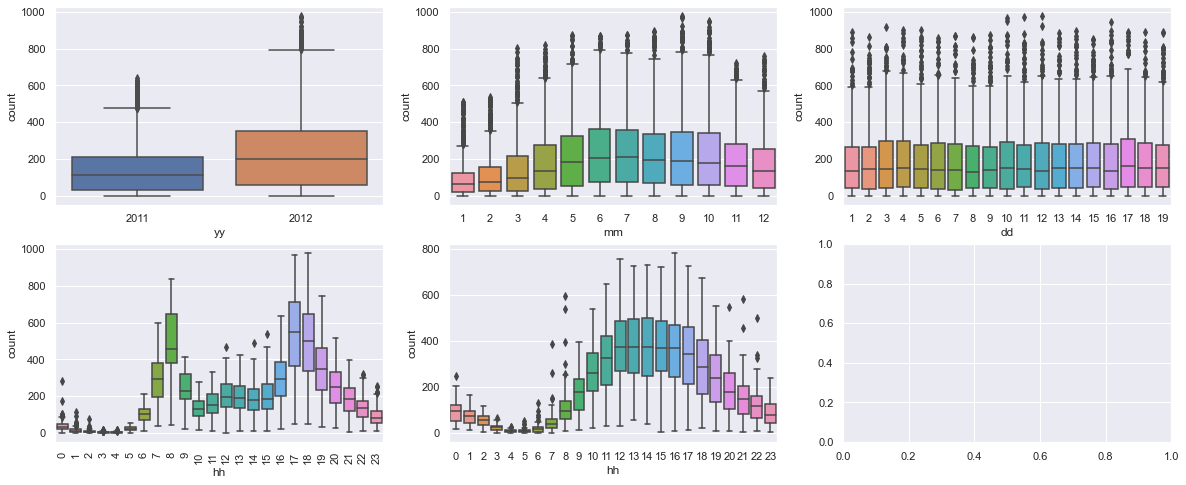

In [53]:
p, axes = plt.subplots(2,3, figsize=(20,8))
sns.boxplot(train_df["yy"], train_df["count"], ax=axes[0][0])
sns.boxplot(train_df["mm"], train_df["count"], ax=axes[0][1])
sns.boxplot(train_df["dd"], train_df["count"], ax=axes[0][2])
sns.boxplot(train_df[train_df['workingday'] == 1]["hh"], train_df["count"], ax=axes[1,0])
sns.boxplot(train_df[train_df['workingday'] == 0]["hh"], train_df["count"], ax=axes[1,1])
axes[1][0].tick_params(axis='x', labelrotation=90)   #------------x축 세로로 출력
# sns.boxplot(train_df["week"], train_df["count"], ax=axes[1][1])
plt.show()

In [54]:
df['peak'] = df[['hh', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hh'] == 8 or 17 <= x['hh'] <= 18 or 12 <= x['hh'] <= 13)) 
                                                          or (x['workingday'] == 0 and  10 <= x['hh'] <= 19)], axis = 1)
#sandy :  2012년 10월 말
df['holiday'] = df[['mm', 'dd', 'holiday', 'yy']].apply(lambda x: (x['holiday'], 1)[x['yy'] == 2012 and x['mm'] == 10 and (x['dd'] in [30])], axis = 1)

#christmas day and others
df['holiday']    = df[['mm', 'dd', 'holiday']].apply(lambda x: (x['holiday'], 1)[x['mm'] == 12 and (x['dd'] in [24, 26, 31])], axis = 1)
df['workingday'] = df[['mm', 'dd', 'workingday']].apply(lambda x: (x['workingday'], 0)[x['mm'] == 12 and x['dd'] in [24, 31]], axis = 1)

df['ideal']  = df[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] > 27 and x['windspeed'] < 30], axis = 1)
df['sticky'] = df[['humidity', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity'] >= 60], axis = 1)

In [55]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,gubun,yy,mm,dd,hh,week,dow,rdate,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,train,2011,1,1,0,5,5,2011-01-01,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,train,2011,1,1,1,5,5,2011-01-01,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,train,2011,1,1,2,5,5,2011-01-01,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,train,2011,1,1,3,5,5,2011-01-01,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,train,2011,1,1,4,5,5,2011-01-01,0,0,0


## 풍속 0 인날

In [56]:
# KNN, RFR ... 

col_list = ['season', 'weather', 'atemp', 'humidity', 'yy', 'mm', 'dd', 'hh']

windspped_X_train = df[df['windspeed'] != .0][col_list]        #--9573 .. ~windspped
windspped_y_train = df[df['windspeed'] != .0]['windspeed']     #--9573 ..  windspped
windspped_X_test  = df[df['windspeed'] == .0][col_list] 
# windspped_y_test  = pred
print(windspped_y_train.shape, windspped_X_train.shape)
windspped_X_train.head()

windspped_model = RandomForestRegressor(n_estimators=100, random_state=1234)
windspped_model.fit(windspped_X_train, windspped_y_train)
windspped_pred = windspped_model.predict(windspped_X_test)           #--1313문제
print(windspped_pred[:5],  windspped_pred.shape)                     #--1313 예측답안갯수

#--15199건에 해당하는 0값을 windspped값을 pred    -->   windspped_y_test로 대체
df.loc[df['windspeed'] == .0 , 'windspeed'] = windspped_pred.reshape(-1,1)

(15199,) (15199, 8)
[9.871177 9.231394 8.881386 8.111355 7.651668] (2180,)


# 1차 점수 보기 : Score: 0.43304

In [78]:
def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    # mean_error = mean_squared_log_error(y_actual, y_pred)
    return np.sqrt(mean_error)


In [79]:
train_df = df[df['gubun']=='train']
test_df  = df[df['gubun']=='test']

In [80]:
cols = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'yy', 'mm', 'hh',  'dow', 'peak', 'ideal', 'sticky']
X = train_df[cols]
y = train_df['count']
y_log = np.log1p(y)
train_X, val_X,train_y, val_y = train_test_split(X, y_log, test_size=0.2, random_state=1234)
test_X = test_df[cols]

In [81]:
# random forest model
# params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
# rf_model = RandomForestRegressor(**params)
rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)
rf_pred = rf_model.predict(val_X)   #np.expm1(rf_model.predict(val_X))
get_rmsle(val_y, rf_pred)

0.0859467196569217

<AxesSubplot:>

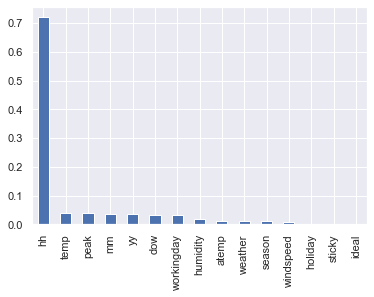

In [82]:
s = pd.Series(data=rf_model.feature_importances_, index=X.columns)
s.sort_values(ascending=False).plot.bar()

In [83]:
pred = rf_model.predict(test_X)
submission_df = pd.read_csv("./sampleSubmission.csv")
submission_df["count"] = np.expm1(pred)
submission_df.head()
submission_df.to_csv("02.1차.csv", index=False)

In [84]:
# GBM model
# params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
# gbm_model = GradientBoostingRegressor(**params)
gbm_model = GradientBoostingRegressor()
gbm_model.fit(train_X, train_y)
rf_pred = np.expm1(gbm_model.predict(val_X))
get_rmsle(val_y, rf_pred)

3.0996941726780007

# 2차 점수 보기 : Score: 0.40834

## 카테고리 처리
<pre>
* season  : 1, 2, 3, 4
* weather : 1, 2, 3, 4
* mm      : 1, 2, 3, 4,5,6,7,8,9,10,11,12
* hh      : 0, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
* yy      : 2011, 2012

In [85]:
def my_eval(model, X, y, test_X, cols=None):
    train_X, val_X,train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1234)
    # test_X = test_df[cols]
    model.fit(train_X, train_y)
    rf_pred = model.predict(val_X)   #np.expm1(rf_model.predict(val_X))
    print(get_rmsle(val_y, rf_pred))
    
    pred = model.predict(test_X)
    submission_df = pd.read_csv("./sampleSubmission.csv")
    submission_df["count"] = np.expm1(pred)
    submission_df.head()
    submission_df.to_csv("lkh.csv", index=False)
    return get_rmsle(val_y, rf_pred)

In [86]:
train_df = df[df['gubun']=='train']
train_df = train_df.reset_index(drop=True)
test_df  = df[df['gubun']=='test']
test_df = test_df.reset_index(drop=True)

cols = ['season', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'yy', 'mm', 'hh',  'dow', 'peak']
X = train_df[cols]
y = train_df['count']
y_log = np.log1p(y)
test_df = test_df[cols]

X_dummy = pd.get_dummies(X, columns=['season','weather','yy','mm','hh','dow'])
test_df = pd.get_dummies(test_df, columns=['season','weather','yy','mm','hh','dow'])
X_dummy.head()

,workingday,temp,atemp,humidity,windspeed,peak,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,yy_2011,yy_2012,mm_1,mm_2,mm_3,mm_4,mm_5,mm_6,mm_7,mm_8,mm_9,mm_10,mm_11,mm_12,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,0,9.84,14.395,81,9.871177,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,9.02,13.635,80,9.231394,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,9.02,13.635,80,8.881386,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,9.84,14.395,75,8.111355,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,9.84,14.395,75,7.651668,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [87]:
rf_model = RandomForestRegressor()
my_eval(rf_model, X_dummy, y_log, test_df)

0.08742809548614495


0.08742809548614495

# 3차 점수 보기 : Score: 0.40725

## 카테고리 + Scaler 처리

In [88]:
# X_dummy
# test_df
X  = X_dummy.copy()
X2 = test_df.copy()

scaler = StandardScaler()
scaler.fit(X[['temp','atemp','humidity','windspeed']])
X_scaler    = scaler.transform(X[['temp','atemp','humidity','windspeed']])
test_scaler = scaler.transform(X2[['temp','atemp','humidity','windspeed']])

X_saler_df     = pd.DataFrame(X_scaler   , columns=['temp','atemp','humidity','windspeed'])
X[['temp','atemp','humidity','windspeed']] = X_saler_df[['temp','atemp','humidity','windspeed']]

test_scaler_df = pd.DataFrame(test_scaler, columns=['temp','atemp','humidity','windspeed'])
X2[['temp','atemp','humidity','windspeed']] = test_scaler_df[['temp','atemp','humidity','windspeed']]

In [89]:
# random forest model
# params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
# rf_model = RandomForestRegressor(**params)
rf_model = RandomForestRegressor()
my_eval(rf_model, X, y_log, X2)

0.0874319142657319


0.0874319142657319

# 4차 점수보기

In [90]:
def objectiveRF(trial,X, y):
    params = {
         "n_estimators"       : trial.suggest_int('n_estimators', 100, 500)
        , "max_depth"         : trial.suggest_int("max_depth", 2, 32, log=True)
        , "min_samples_split" : trial.suggest_int("min_samples_split", 2, 10)
    }

    score = []
    model = RandomForestRegressor(**params)
    model.fit(X, y)    
    score = -1*cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_log_error")  
    score = score.mean()
    return score

In [91]:
# study_red = optuna.create_study(direction="minimize")
# study_red.optimize(lambda trial: objectiveRF(trial,  X, y_log), n_trials=10) 

# print('study.best_score:'         , study_red.best_trial.value)
# print('Number of finished trials:', len(study_red.trials))
# print('Best trial:'               , study_red.best_trial.params)
# print('study.best_params:'        , study_red.best_params)

In [92]:
# # best_params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
# best_params = {'n_estimators': 310, 'max_depth': 5, 'min_samples_split': 6, 'n_jobs': -1}
# rf_model = RandomForestRegressor(**best_params)
# my_eval(rf_model, X, y_log, X2)

# 5차 점수보기

In [93]:
models = [ NuSVR(), KNeighborsRegressor(), BaggingRegressor(),  AdaBoostRegressor(), Ridge(), Lasso()
    , RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor(), CatBoostRegressor()]

res = []
for model in models:
    try : 
        print(model.__class__.__name__)
        ss = my_eval(model, X, y_log, X2)
        s = pd.Series(data=model.feature_importances_, index=X.columns)
        # s.sort_values(ascending=False).plot.bar()
        # plt.show()
        # plt.close()
        # print( s.sort_values(ascending=False))
    except :
        continue
    finally:
        res.append((model.__class__.__name__, ss))
    print("-----"*30)

NuSVR
0.09616147925280114
KNeighborsRegressor
0.20963686459046488
BaggingRegressor
0.08984688121174401
AdaBoostRegressor
0.22411248472019055
------------------------------------------------------------------------------------------------------------------------------------------------------
Ridge
0.13915953846254
Lasso
0.3235004505703322
RandomForestRegressor
0.08761987027205245
------------------------------------------------------------------------------------------------------------------------------------------------------
GradientBoostingRegressor
0.1105699855265616
------------------------------------------------------------------------------------------------------------------------------------------------------
XGBRegressor
0.08490517544502955
------------------------------------------------------------------------------------------------------------------------------------------------------
LGBMRegressor
0.08369446232070533
-----------------------------------------------------

## model selection

In [94]:
score_df = pd.DataFrame(res)
score_df.sort_values(1).head(10)

,0,1
10,CatBoostRegressor,0.079764
9,LGBMRegressor,0.083694
8,XGBRegressor,0.084905
6,RandomForestRegressor,0.087620
2,BaggingRegressor,0.089847
0,NuSVR,0.096161
7,GradientBoostingRegressor,0.110570
4,Ridge,0.139160
1,KNeighborsRegressor,0.209637
3,AdaBoostRegressor,0.224112


# 6차 점수보기 : Score: 0.38200

## Votting

In [95]:
from sklearn.ensemble import VotingRegressor
model1 = CatBoostRegressor()
model2 = LGBMRegressor()
model3 = XGBRegressor()
model4 = RandomForestRegressor()
model5 = BaggingRegressor()

# CatBoostRegressor	0.076883
# LGBMRegressor	0.078864
# XGBRegressor	0.080190
# RandomForestRegressor	0.085861
# BaggingRegressor	0.088777


vc = VotingRegressor(estimators=[('M1'  , model1),
                                 ('M2', model2),
                                 ('M3', model3),
                                 ('M4' , model4),
                                 ('M5' , model5)
                                ])
vc.fit(X, y_log)
pred = vc.predict(X2)
print("-----------------------------------------------------", pred[:5])

submission_df = pd.read_csv("./sampleSubmission.csv")
submission_df["count"] = np.expm1(pred)
submission_df.head()
submission_df.to_csv("lkh.csv", index=False)
    
    


Learning rate set to 0.059704
0:	learn: 1.3662029	total: 4.27ms	remaining: 4.27s
1:	learn: 1.3168805	total: 11.4ms	remaining: 5.68s
2:	learn: 1.2723556	total: 19.8ms	remaining: 6.58s
3:	learn: 1.2303713	total: 29.7ms	remaining: 7.39s
4:	learn: 1.1936347	total: 41.6ms	remaining: 8.27s
5:	learn: 1.1581851	total: 45.1ms	remaining: 7.46s
6:	learn: 1.1261740	total: 49.9ms	remaining: 7.08s
7:	learn: 1.0966904	total: 58.6ms	remaining: 7.26s
8:	learn: 1.0670196	total: 74.5ms	remaining: 8.2s
9:	learn: 1.0395103	total: 79.1ms	remaining: 7.83s
10:	learn: 1.0185418	total: 82.4ms	remaining: 7.41s
11:	learn: 0.9929292	total: 88.5ms	remaining: 7.29s
12:	learn: 0.9747325	total: 93.1ms	remaining: 7.07s
13:	learn: 0.9559909	total: 97.6ms	remaining: 6.87s
14:	learn: 0.9375225	total: 111ms	remaining: 7.27s
15:	learn: 0.9197678	total: 121ms	remaining: 7.42s
16:	learn: 0.8992703	total: 129ms	remaining: 7.43s
17:	learn: 0.8762205	total: 135ms	remaining: 7.35s
18:	learn: 0.8623940	total: 139ms	remaining: 7.19

In [96]:
# pred = np.round(.20*rf_pred + .80*gbm_pred)
# pred[:5]

<img src="./board.png">